**Apply KMeans clustering on the Driver dataset_csv and identify exact clusters using Elbow method to model the algorithm**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [8]:
#load the data
df = pd.read_csv('/content/sample_data/driver-data.csv',index_col="id")
df.head()

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


<Figure size 600x400 with 0 Axes>

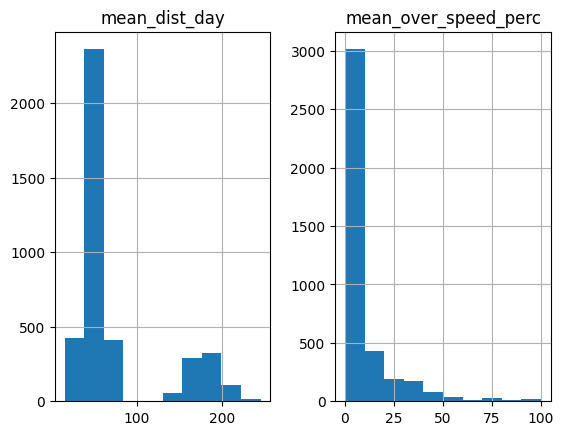

<Figure size 600x400 with 0 Axes>

In [9]:
df.hist()
plt.figure(figsize=(6,4))

In [11]:
X = df[["mean_dist_day","mean_over_speed_perc"]]

In [13]:
X[:2]

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25


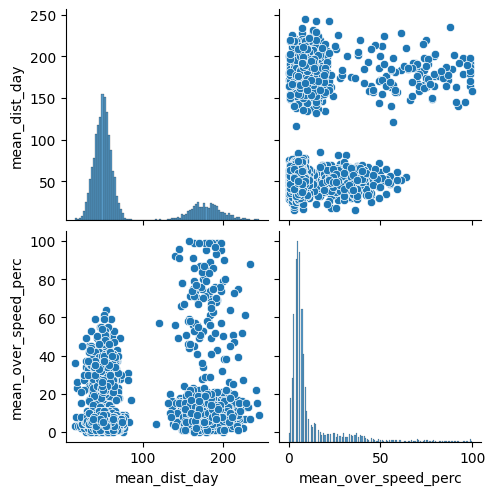

In [16]:
sns.pairplot(df)

In [ ]:
#As we see above, our dataset is not scaled so we need to do scaling on it
#we use MinMax scaler

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
msc = MinMaxScaler()

In [32]:
ndf = msc.fit_transform(df)

array([[<Axes: title={'center': 'mean_dist_day'}>,
        <Axes: title={'center': 'mean_over_speed_perc'}>]], dtype=object)

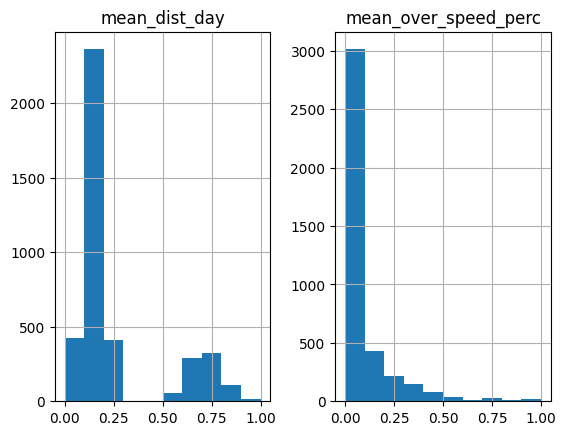

In [36]:
# Convert the NumPy array 'ndf' back to a Pandas DataFrame.
ndf = pd.DataFrame(ndf, columns=df.columns)

# Now you can plot the histogram.
ndf.hist()

In [38]:
km = KMeans(n_clusters=4)
km


KMeans(n_clusters=4)

In [39]:
y_pred=km.fit_predict(X)
y_pred

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [40]:
km.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [41]:
ndf["cluster"]=km.labels_
ndf.head()

,mean_dist_day,mean_over_speed_perc,cluster
0,0.243032,0.28,2
1,0.161425,0.25,2
2,0.213809,0.27,2
3,0.175208,0.22,2
4,0.170367,0.25,2


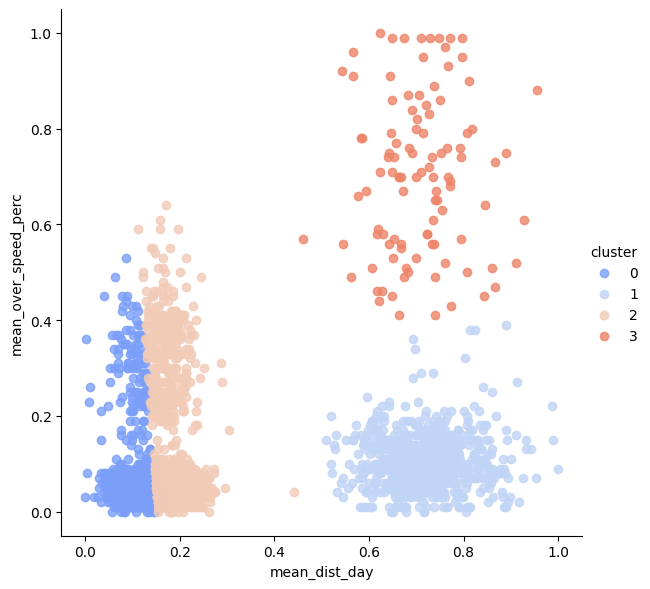

In [43]:
#plotting after scaling
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', data=ndf, hue='cluster', palette='coolwarm', height=6, aspect=1, fit_reg=False)

In [47]:
ndf1 = ndf[ndf['cluster']==0]
ndf2 = ndf[ndf['cluster']==1]
ndf3 = ndf[ndf['cluster']==2]
ndf4 = ndf[ndf['cluster']==3]

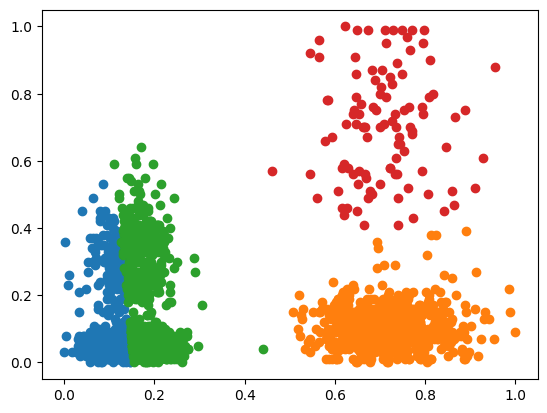

In [65]:
plt.scatter(ndf1['mean_dist_day'],ndf1['mean_over_speed_perc'],label='cluster 1')
plt.scatter(ndf2['mean_dist_day'],ndf2['mean_over_speed_perc'],label='cluster 2')
plt.scatter(ndf3['mean_dist_day'],ndf3['mean_over_speed_perc'],label='cluster 3')
plt.scatter(ndf4['mean_dist_day'],ndf4['mean_over_speed_perc'],label='cluster 4')




In [51]:
km.cluster_centers_

array([[ 41.28148892,   7.22922438],
       [180.43486331,  10.5294964 ],
       [ 57.29000569,  10.14058054],
       [177.83509615,  70.28846154]])

In [59]:
km.cluster_centers_[:,0]

array([ 41.28148892, 180.43486331,  57.29000569, 177.83509615])

In [60]:
km.cluster_centers_[:,1]

array([ 7.22922438, 10.5294964 , 10.14058054, 70.28846154])

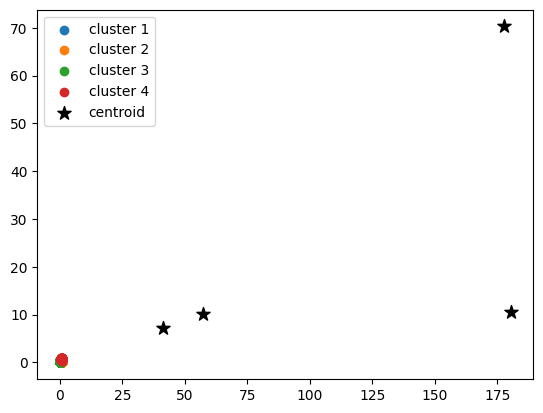

In [66]:
#plotting of cetroids
plt.scatter(ndf1['mean_dist_day'],ndf1['mean_over_speed_perc'],label='cluster 1')
plt.scatter(ndf2['mean_dist_day'],ndf2['mean_over_speed_perc'],label='cluster 2')
plt.scatter(ndf3['mean_dist_day'],ndf3['mean_over_speed_perc'],label='cluster 3')
plt.scatter(ndf4['mean_dist_day'],ndf4['mean_over_speed_perc'],label='cluster 4')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',label='centroid',marker="*",s=100)
plt.legend()

In [67]:
km.predict([[75,36]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

In [68]:
test_data = ndf[['mean_dist_day','mean_over_speed_perc']].sample(5)
test_data

,mean_dist_day,mean_over_speed_perc
868,0.145898,0.03
3038,0.190343,0.08
2350,0.119728,0.08
1214,0.115497,0.08
180,0.247917,0.04


In [69]:
#with scaling data
km.predict(test_data)

array([0, 0, 0, 0, 0], dtype=int32)

In [70]:
without_test = X.iloc[test_data.index,:-1]
without_test

,mean_dist_day
id,
3423311853,48.97
3423312434,59.16
3423311950,42.97
3423313771,42.00
3423310596,72.36


**::# WCSS: WIthin Cluster Sum of Square**

In [72]:
km

KMeans(n_clusters=4)

In [73]:
km.inertia_

782975.5888895693

In [75]:
X = ndf[['mean_dist_day','mean_over_speed_perc']]
X.head()

,mean_dist_day,mean_over_speed_perc
0,0.243032,0.28
1,0.161425,0.25
2,0.213809,0.27
3,0.175208,0.22
4,0.170367,0.25


In [76]:
wcss = []
for i in range(1,11):#i will take 1 to 10 cluster
    km = KMeans(n_clusters=i)
    km.fit(X)
    #print('Cluster:',i,km.inertia_)
    wcss.append(km.inertia_)

In [77]:
print(wcss)

[292.6563442304926, 81.2481749083151, 53.67881335105334, 21.627961552686887, 18.134843405123874, 17.1792834750837, 13.734482507685838, 11.951800897657296, 9.738755510140365, 10.692367985150492]


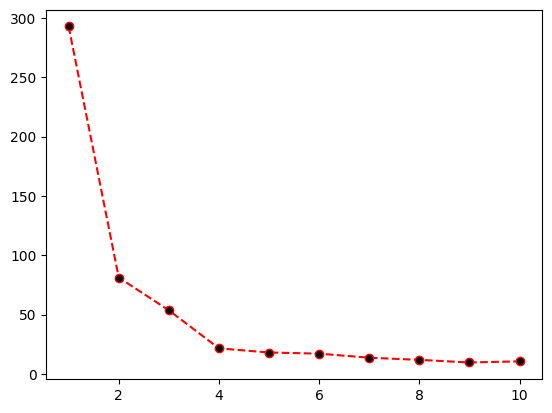

In [78]:
#check elbow
plt.plot(range(1,11),wcss,linestyle='--',marker='o',color='r',mfc='k',markersize=6)

In [79]:
# To measure the performance of KMeans model use silhoutte_score
from sklearn.metrics import silhouette_score

In [80]:
new = KMeans(n_clusters=4)

In [81]:
new.fit(X)

KMeans(n_clusters=4)

In [82]:
new.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [83]:
silhouette_score(X,new.labels_)

0.7474084657863905

In [84]:
score = []
for i in range(2,11):
    new = KMeans(n_clusters=i)
    new.fit(X)
    print('Cluster:',i,'Score:',silhouette_score(X,new.labels_))

Cluster: 2 Score: 0.77959774500679
Cluster: 3 Score: 0.7245432482720311
Cluster: 4 Score: 0.7474084657863905
Cluster: 5 Score: 0.7345133715572586
Cluster: 6 Score: 0.48369502317586954
Cluster: 7 Score: 0.42098230077963
Cluster: 8 Score: 0.38247724415909595
Cluster: 9 Score: 0.37506037010214743
Cluster: 10 Score: 0.3725052349705995


In [ ]:
#from above score,we select 2 clusters with highest silhouttee_score=0.779597

In [85]:
# convert scalled data to csv
X.to_csv('final.csv',index=False)

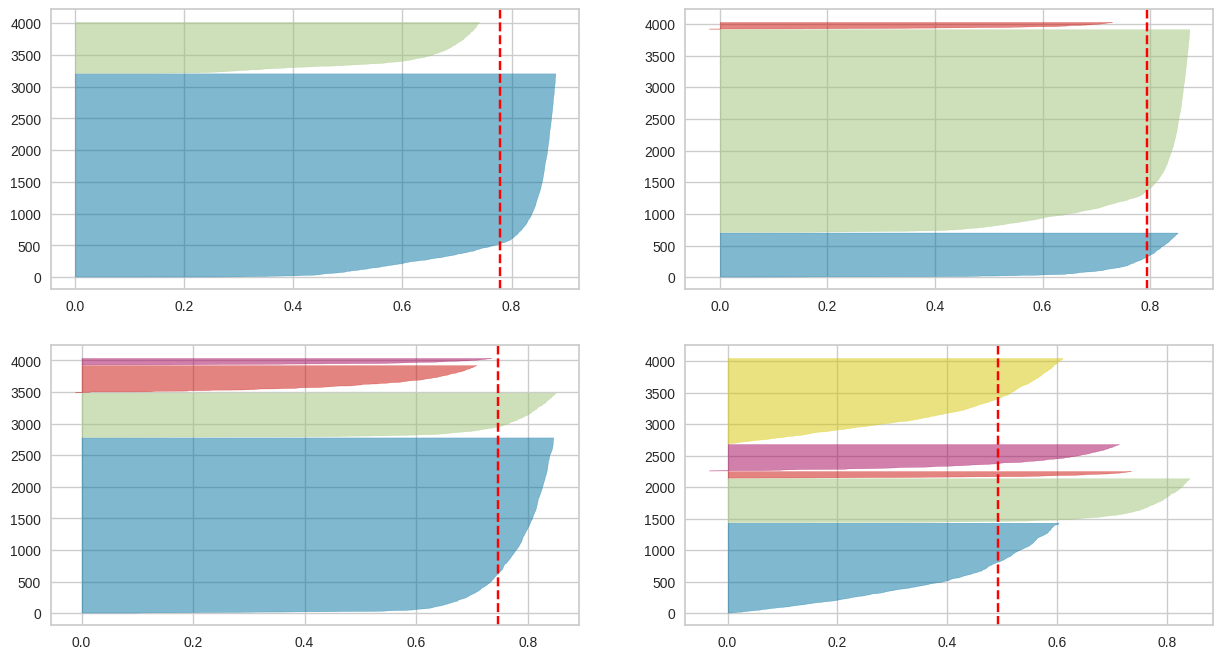

In [86]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

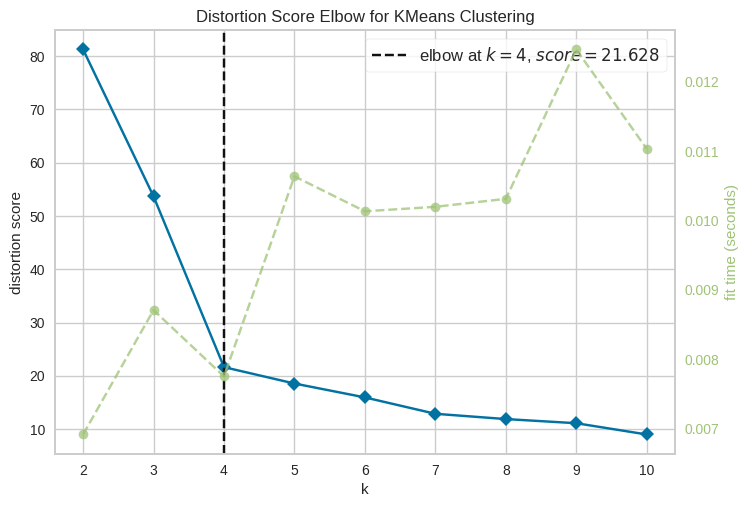

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure